<a href="https://colab.research.google.com/github/jburchfield76/datasharing/blob/master/ARIMA_Residual_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


<ipython-input-2-fed6c97caa1a>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start='2023-01-01', periods=10, freq='M'),


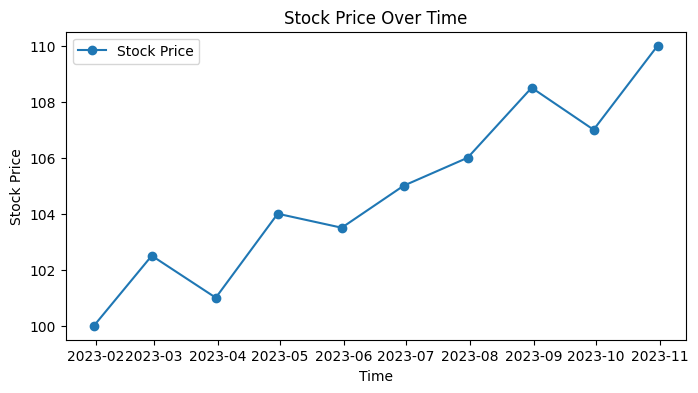

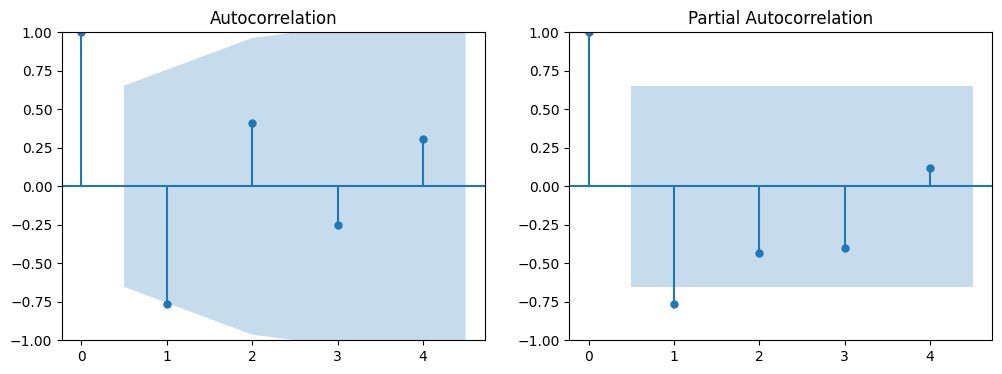

In [2]:
# Create data
data = {
    'Month': pd.date_range(start='2023-01-01', periods=10, freq='M'),
    'Stock_Price': [100.0, 102.5, 101.0, 104.0, 103.5, 105.0, 106.0, 108.5, 107.0, 110.0]
}

df = pd.DataFrame(data)
df.set_index('Month', inplace=True)  # Set date as index

# Plot the original data
plt.figure(figsize=(8, 4))
plt.plot(df['Stock_Price'], marker='o', linestyle='-', label="Stock Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Over Time")
plt.legend()
plt.show()

# First Differencing (d=1)
df['Differenced'] = df['Stock_Price'].diff()

# ACF & PACF plots to identify p and q
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['Differenced'].dropna(), ax=axes[0])
plot_pacf(df['Differenced'].dropna(), ax=axes[1])
plt.show()


In [3]:
# Fit ARIMA(1,1,1) model-see GPT convo for assumption
model = ARIMA(df['Stock_Price'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast next 3 months
forecast = model_fit.forecast(steps=3)
print("\nForecasted Stock Prices for Next 3 Months:")
print(forecast)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Stock_Price   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -16.473
Date:                Fri, 28 Feb 2025   AIC                             38.946
Time:                        04:20:09   BIC                             39.538
Sample:                    01-31-2023   HQIC                            37.669
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.071    -14.062      0.000      -1.139      -0.861
ma.L1          0.9945     19.853      0.050      0.960     -37.917      39.906
sigma2         1.6967     32.814      0.052      0.9

<ipython-input-4-7268da2d54e7>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=4, freq='M')[1:], forecast, marker='o', linestyle='--', color='red', label="Forecasted Price")


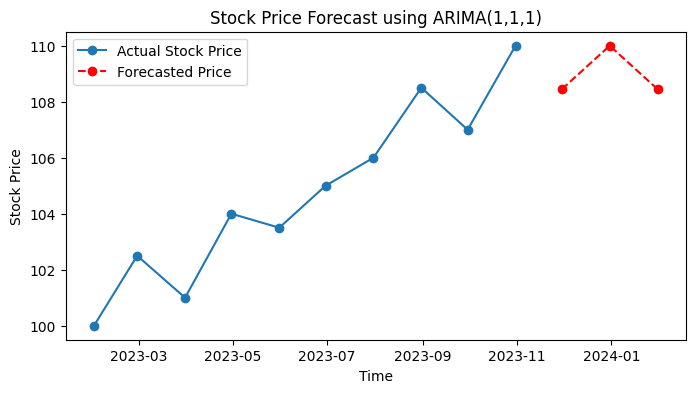

In [4]:
# Plot actual vs predicted
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Stock_Price'], marker='o', linestyle='-', label="Actual Stock Price")
plt.plot(pd.date_range(df.index[-1], periods=4, freq='M')[1:], forecast, marker='o', linestyle='--', color='red', label="Forecasted Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Forecast using ARIMA(1,1,1)")
plt.legend()
plt.show()


In [5]:
# fine tune parameters
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Define range for p, d, q
p = range(0, 3)  # Autoregressive terms
d = range(0, 2)  # Differencing terms
q = range(0, 3)  # Moving average terms

# Generate all possible combinations
pdq_combinations = list(itertools.product(p, d, q))

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Grid search for best (p, d, q)
best_aic = float("inf")
best_order = None
best_model = None

for order in pdq_combinations:
    try:
        model = ARIMA(df['Stock_Price'], order=order)
        model_fit = model.fit()
        aic = model_fit.aic

        print(f"ARIMA{order} - AIC: {aic}")

        if aic < best_aic:
            best_aic = aic
            best_order = order
            best_model = model_fit
    except:
        continue

print(f"\nBest ARIMA Order: {best_order} with AIC: {best_aic}")


ARIMA(0, 0, 0) - AIC: 54.58438323929244
ARIMA(0, 0, 1) - AIC: 54.368735595841336
ARIMA(0, 0, 2) - AIC: 49.99535343972177
ARIMA(0, 1, 0) - AIC: 40.62179657342443
ARIMA(0, 1, 1) - AIC: 41.873386860500695
ARIMA(0, 1, 2) - AIC: 37.546617396942466
ARIMA(1, 0, 0) - AIC: 49.8139484230921
ARIMA(1, 0, 1) - AIC: 51.18081236199959
ARIMA(1, 1, 0) - AIC: 40.52359356136832
ARIMA(1, 1, 1) - AIC: 38.946299189226934
ARIMA(1, 1, 2) - AIC: 39.50857115214063
ARIMA(2, 0, 0) - AIC: 49.834869531856455
ARIMA(2, 0, 1) - AIC: 48.27639115947649
ARIMA(2, 0, 2) - AIC: 48.82964308078151
ARIMA(2, 1, 0) - AIC: 37.27825105212057
ARIMA(2, 1, 1) - AIC: 36.3956093766772

Best ARIMA Order: (2, 1, 1) with AIC: 36.3956093766772


                               SARIMAX Results                                
Dep. Variable:            Stock_Price   No. Observations:                   10
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -14.198
Date:                Fri, 28 Feb 2025   AIC                             36.396
Time:                        04:25:30   BIC                             37.185
Sample:                    01-31-2023   HQIC                            34.693
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1308      0.328      0.398      0.690      -0.513       0.775
ar.L2          0.8691      0.286      3.036      0.002       0.308       1.430
ma.L1         -0.9919     17.717     -0.056      0.9

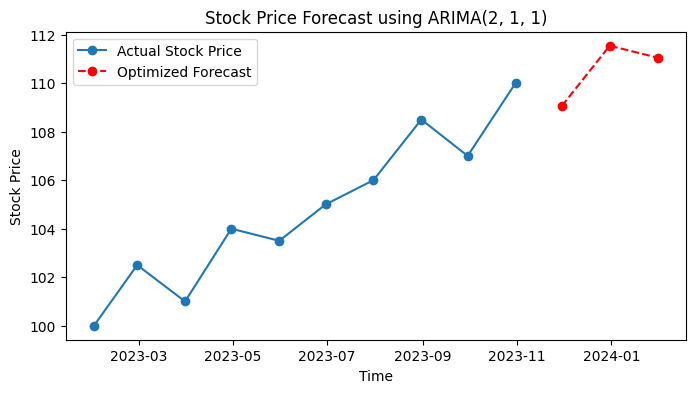

In [6]:
# Fit the best ARIMA model
best_arima_model = ARIMA(df['Stock_Price'], order=best_order)
best_model_fit = best_arima_model.fit()

# Print model summary
print(best_model_fit.summary())

# Forecast next 3 months
forecast_optimized = best_model_fit.forecast(steps=3)
print("\nOptimized Forecast for Next 3 Months:")
print(forecast_optimized)

# Plot actual vs optimized forecast
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Stock_Price'], marker='o', linestyle='-', label="Actual Stock Price")
plt.plot(pd.date_range(df.index[-1], periods=4, freq='M')[1:], forecast_optimized, marker='o', linestyle='--', color='red', label="Optimized Forecast")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(f"Stock Price Forecast using ARIMA{best_order}")
plt.legend()
plt.show()


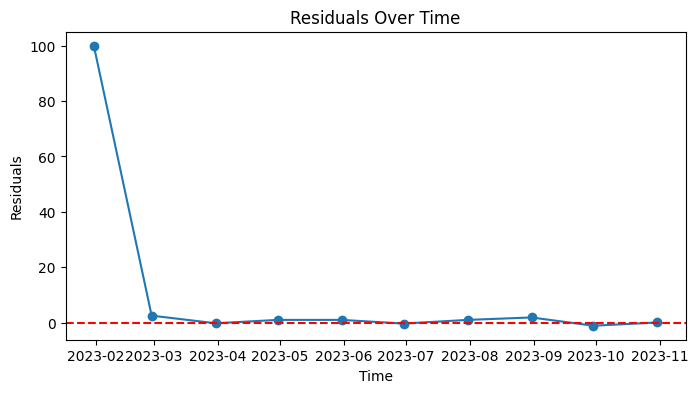

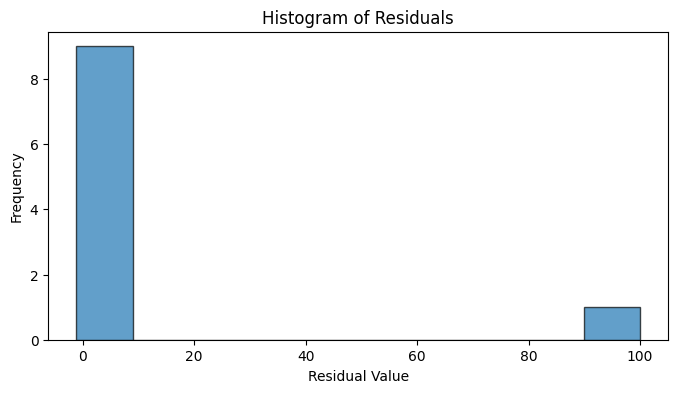

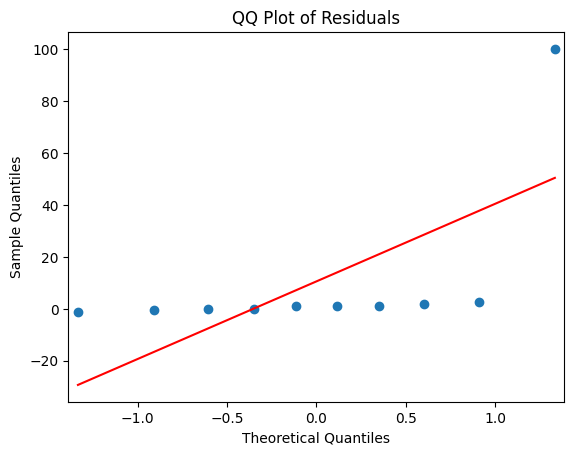


Ljung-Box Test Results:
    lb_stat  lb_pvalue
5  0.169742   0.999406


In [7]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

# Get residuals
residuals = best_model_fit.resid

# Plot residuals over time
plt.figure(figsize=(8, 4))
plt.plot(residuals, marker='o', linestyle='-')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals Over Time")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=10, edgecolor='black', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

# QQ Plot (should be close to a straight line if normal)
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

# Ljung-Box Test (checks if residuals are uncorrelated)
ljung_box_results = acorr_ljungbox(residuals, lags=[5], return_df=True)
print("\nLjung-Box Test Results:")
print(ljung_box_results)
